# Practical Linear Algebra for Data Science  
From Core Concepts to Applications Using Python
(c) Mike X Cohen

Code excersises has been resolved with the help   (code examples, exercises, etc.) is available for
at https://github.com/mikexcohen/LinAlg4DataScience.

## GLOSSARY

**Vector** 
- is an arrow in space with a specific direction and length, often representing a piece of data.
- the purpose of the vector is to visually represent a piece of data
  
  <img src="./images/fig_4-1-vector.png" width="300" />
  
**Vectot dimensionality**  
- The number of elements in vector

**Norm, Magnitude**
- Geometric length of a vector

**Unit-norm**
- Gemetric length of 1
- $ \hat{v} $

**Determinant**
- Determinant describe how much a sampled area in a vector space changes in scale with linear transformations. This can provide helpful information about the transformation.
- Determinant of zero meaning a linear dependency exists
**Types of Matrices**
- Square matrix - has an equal number of rows and columns
- Identity matrix= All 0 except diagonal of 1
- Inverse matrix - matrix that undo the transofrmations of other matrix being done
- Diagonal matrix - similar to identity matrix, exept diagonal is formed by any number
- Triangular matrix - similar to identity except non zero values filling top triangle above diagonal
- Sparse matrix- formed mostly by zeros except few values

**Vectors set**
- $S,V = \{v_1,....v_n\}$ a collection of vectors

**Linear weighted combination, Linear mixture, weightd combination**
- a way of mixing information from multiple variables. Means simply vector multiplication or adition
  $w = \lambda_1 v_1 + \lambda_2 v_2 + ... + \lambda_n v_n$

**Regressor**
- predicted variable

**Coefficient**
- scalar

**Linear dependecy**
- if at least one vector in a set can be expressed as a linear weighted combination of other vectors in that set
-  $0 = \lambda_1 v_1 + \lambda_2 v_2 + ... + \lambda_n v_n$ - if true then linear dependend

**Span**
- Combination of all possible linear weighte combinations of a set of vectors. Think span of it as a verb. Span is a mechanism to create a subspace

**Vector subspace**
- created from all possible linear combinations of a set of vectors. Think  of subspace as a Noun

**Basis**
- A basis is a ruler for measuring a space. A vector set can be a basis for a sunspace if it $1$ spans that subspace sn $2$ is linearly indepenededn. *A mojor goal in data sciene is to discover the best basis set to describe datasets or to solve problems*

## SETUP

### Imports

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

### Global Settings

In [2]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14})

### Functions

## PROBLEMS

### Chapter 2

#### 2-1 Vector Addition

<function matplotlib.pyplot.show(close=None, block=None)>

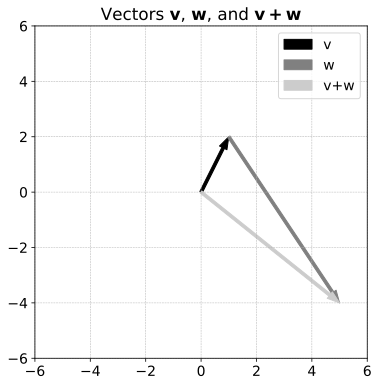

In [3]:
v= np.array([1,2])
w= np.array([4,-6])

vPlusw= v+w

plt.figure(figsize=(6,6))

a1= plt.arrow(
    0,0,
    v[0],v[1],
    head_width=.3,
    width=.1,
    color='k',
    length_includes_head=True
)
a2= plt.arrow(
    v[0],v[1],
    w[0],w[1],
    head_width=.3,
    width=.1,
    color=[.5,.5,.5],
    length_includes_head=True
)
a3= plt.arrow(
    0,0,
    vPlusw[0],vPlusw[1],
    head_width=.3,
    width=.1,
    color=[.8,.8,.8],
    length_includes_head=True
)

plt.grid(linestyle='--', linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v+w'])
plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v+w}$')
plt.show

**SUMMARY**

Vector addoton is pretty streight forward:  

- Algebraicly  
$
  v + w = \begin{bmatrix} 1 + 4 \\ 2 + (-6) \end{bmatrix} = \begin{bmatrix} 5 \\ -4 \end{bmatrix}
$
- Geometricaly  
put tail of second vector to the head of first and draw line


#### 2-3 Unit Norm vector

Norm is the magnitude or in a geometrical sence it is mean length. Which is the distance from tail to head and it is computed using standard Euclidian distance formula

$
    ||v|| = \sqrt{\sum_{i=1}^{n} v_i^2}
$

Unit vector is the product of reciprocal of the vector norm and vector it self  
$
    \hat{v}= v (\frac{1}{||v||}) = \frac{v}{||v||}
$

In [4]:
def normOfVect(v):
    return np.sqrt(np.sum(v**2))

# Test on unit-norm vector
w1= np.array([0,0,1])
print(normOfVect(w1))

# non unit-norm vector
w2= np.array([1,2,3])
print(normOfVect(w2), np.linalg.norm(w2))

1.0
3.7416573867739413 3.7416573867739413


In [5]:
def createUnitVector(v):    
    mu= np.linalg.norm(v)
    return v / mu

w= np.array([0,1,0])
print(createUnitVector(w))

w= np.array([0,3,0])
print(createUnitVector(w))

w= np.array([13,-5,7])
print(createUnitVector(w))

createUnitVector(np.zeros((4,1)) )

[0. 1. 0.]
[0. 1. 0.]
[ 0.83395039 -0.32075015  0.44905021]


/tmp/ipykernel_468/1160802533.py:3: RuntimeWarning: invalid value encountered in divide
  return v / mu


array([[nan],
       [nan],
       [nan],
       [nan]])

#### 2-4 Scale vector

In [6]:
def createMagVec(v, mag):
    '''
    First calculates vector norm, then multiplies unit vectoe reciprocal on to the magnite.
    This all to create a scaled vector which is lies in same direction as original
    '''
    mu= np.linalg.norm(v)
    return mag * (v / mu)

w= np.array([1,0,0])
mw= createMagVec(w,4)
print(mw)

print(np.linalg.norm(w), np.linalg.norm(mw))

[4. 0. 0.]
1.0 4.0


#### 2-5 Transposing a row vector into a column vector

A matrix has rows(i) and columns(j) therfore each element in matrix has a row,columns index [i,j]. The transpose (T) operation is simply swaps i,j indices:  
$
m^T_{i,j} = m_{j,i}
$

In [11]:
row_v= np.array([[1,2,3]])
col_v= np.zeros((3,1))
col_vT= np.zeros((3,1))

for i in range(row_v.shape[1]):
    col_vT[i,0] = row_v[0,i]

print(f'Row vector:\n {row_v}')
print(f'Col vector:\n {col_v}')
print(f'Transposed vector:\n {col_vT}')

Row vector:
 [[1 2 3]]
Col vector:
 [[0.]
 [0.]
 [0.]]
Transposed vector:
 [[1.]
 [2.]
 [3.]]


#### 2-6 Compute vecvor's squred norm by dot product



**Math. Formula for the squared Euclidean norm:**
$
\|\mathbf{v}\|^2 = \sum_{i=1}^n v_i^2
$

and here is the formula for dot product of vector by it self  
$
\mathbf{v} \cdot \mathbf{v} = \sum_{i=1}^n v_i v_i = \sum_{i=1}^n v_i^2
$

**Geometric formula for squared norm**  
$
\mathbf{v} \cdot \mathbf{u} = \|\mathbf{v}\| \|\mathbf{u}\| \cos \theta
$  

thus when 2 vectors are equal  
$
\mathbf{v} \cdot \mathbf{v} = \|\mathbf{v}\| \|\mathbf{v}\| \cdot 1 = \|\mathbf{v}\|^2
$

In [13]:
random_v= np.random.rand(5)

# squared morm as a dot product with it self
norm_sqr1= np.dot(random_v, random_v)
norm_sqr2= normOfVect(random_v)**2
norm_sqr3= random_v @ random_v

print(f'norm_sqr1:{norm_sqr1}')
print(f'norm_sqr2:{norm_sqr2}')
print(f'norm_sqr3:{norm_sqr3}')

norm_sqr1:2.0338040757008655
norm_sqr2:2.033804075700865
norm_sqr3:2.0338040757008655


#### 2-7 Commutatuve property of a vectors dot product

$
\mathbf{a}^T \mathbf{b} = \mathbf{b}^T \mathbf{a}
$

In [19]:
# Vector dimensionality
v_dim=11

a= np.random.rand(v_dim,1)
b= np.random.rand(v_dim,1)

aTb= np.sum(a * b)
bTa= b.T @ a

print(f'aTb - bTa={aTb-bTa}')

aTb - bTa=[[0.]]


#### 2-8 Code that repeates

<img src="./images/fig_2-6.png" width="150" />

The goal is to find the point on a that is as close as possible to the head of b
**Algorythm**
1. Find scale factor $\beta$ for vector 'a' such that lenght of $\beta \text{a} = \text{b}$. The point $\beta$ is othogonal to the vector b. Another words:  
$\text{a}*(\text{b}-\beta\text{b})=0$  
$\text{a}*\text{b} -\beta (\text{a}*\text{a})=0$  
$\beta(\text{a}*\text{a}) = \text{a}*\text{b} | / (\text{a}*\text{a})$  
$\beta=\frac{\text{a}*\text{b}}{\text{a}*\text{a}}$

2. Compute projection point $\beta$

In [28]:
vec_a= np.array([1,2])
vec_b= np.array([1.5,.5])

# compute beta
beta_scalar= (vec_a @ vec_b) / (vec_a @ vec_a)

# compute projection point
projection_point = (vec_b - (beta_scalar*vec_a))


#### 2-9 Orthogonal vector decomposition
<img src="./images/fig_2-7.png" width="200" />
Orthogonal vector decomposition is the process of breaking a vector into two components:  

- $t \parallel r $ t parallel to a given vector 'r' (or subspace). The paralel vector is any scaled version of vector r
- $t \perp r$ perpendicular (orthogonal) to the same vector 'r' (or subspace).

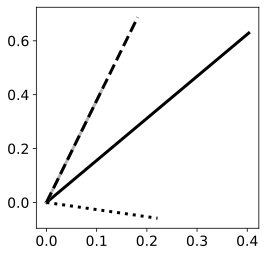

In [43]:
vec_t= np.random.rand(2)
vec_r= np.random.rand(2)

t_parallel_r= vec_r * ((vec_t @ vec_r) / (vec_r @ vec_r))
t_perpend_r = vec_t - t_parallel_r

plt.figure(figsize=(4,4));

# Main vectors
plt.plot([0,vec_t[0]],[0,vec_t[1]], color='k', linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,vec_r[0]],[0,vec_r[1]], color=[.7,.7,.7], linewidth=3,label=r'$\mathbf{r}$')

# Decomposed vectors
plt.plot([0,t_parallel_r[0]],[0,t_parallel_r[1]], 'k--', linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,t_perpend_r[0]],[0,t_perpend_r[1]], 'k:', linewidth=3,label=r'$\mathbf{t}$')


#### 2-10 Made up bug

In [44]:
t_paralle_r= vec_r * ((vec_t @ vec_r) / (vec_t @ vec_t))

### Chapter 3

#### 3-1 Linear weighted combinantion

In [48]:
# Scalars
lambda1= 1
lambda2= 2
lambda3= -3

# Vectors
v1= np.array([4,5,1])
v2= np.array([-4,0,-4])
v3= np.array([1,3,2])

# Linear weighted combination
lwc = lambda1*v1 + lambda2*v2 + lambda3*v3

print(lwc)

# Organize scalars list
scalars= [lambda1, lambda2, lambda3]
vectors= [v1, v2, v3]

# Linear weighte combination via zip
for s,v in zip(scalars, vectors):
    linCombo += s*v
print(linCombo)

[ -7  -4 -13]
[ -7.  -4. -13.]


#### 3-3 Draw a random points in subspace

Text(-4.5, 4.5, 'A)')

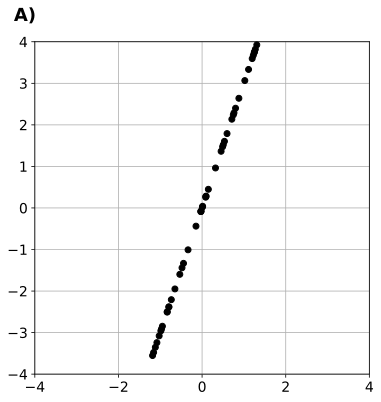

In [67]:
# The vector set containing just one vector
A= np.array([1,3])

# x-axix range
xlim= [-4,4]

# random scalars from xlim space
scalars= np.random.uniform(low=xlim[0], high=xlim[1], size=100)

plt.figure(figsize=(6,6))
for s in scalars:
    # crete point p
    p= A*s
    plt.plot(p[0],p[1],'ko')

plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.text(-4.5, 4.5, 'A)', fontweight='bold', fontsize=18)



In [ ]:

pio.renderers.default = 'notebook'
v1= np.array([3,5,1])
v2= np.array([0,2,2])
trDPoints= np.zeros((100,3))
scalars= np.random.uniform(low=xlim[0], high=xlim[1], size=(100,2))
for i in range(len(scalars)):
    trDPoints[i,:]= v1*scalars[i,0] + v2*scalars[i,1]

fig=go.Figure(data=[go.Scatter3d(x=trDPoints[:,0], 
                                 y=trDPoints[:,1], 
                                 z=trDPoints[:,2], 
                                 mode='markers', 
                                 marker=dict(size=6,color='black') )]);
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plt.savefig('Figure_03_07b.png',dpi=300)
fig.show()

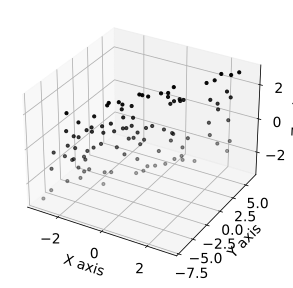

In [85]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определяем символы
s1, s2 = sp.symbols('s1 s2')

# Векторы
v1 = sp.Matrix([3, 5, 1])
v2 = sp.Matrix([0, 2, 2])

# Линейная комбинация
point = s1 * v1 + s2 * v2

# Численные значения для границ
xlim = [-1, 1]

# Генерация случайных скаляров
scalars = np.random.uniform(low=xlim[0], high=xlim[1], size=(100, 2))

# Вычисление точек в численном виде
trDPoints = []
for s1_val, s2_val in scalars:
    numeric_point = point.subs({s1: s1_val, s2: s2_val})  # Подстановка значений
    trDPoints.append([float(numeric_point[0]), float(numeric_point[1]), float(numeric_point[2])])

# Конвертация в numpy-массив
trDPoints = np.array(trDPoints)

# Построение 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trDPoints[:, 0], trDPoints[:, 1], trDPoints[:, 2], c='black', s=10)

# Настройка осей
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()
